In [9]:
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

2.5.1+cu121
2.7.18


# Deep Learning model

In [10]:
from fastai.vision.all import *
from ipywidgets import widgets

path = untar_data(URLs.PETS)/'images'
def is_cat(x):return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2,seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 95.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.169180,0.019720,0.992558,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.058855,0.014643,0.995940,00:52
1,0.029420,0.009697,0.993911,00:53


# Data Upload Section

In [15]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is this a cat?: True
Probability: 1.000


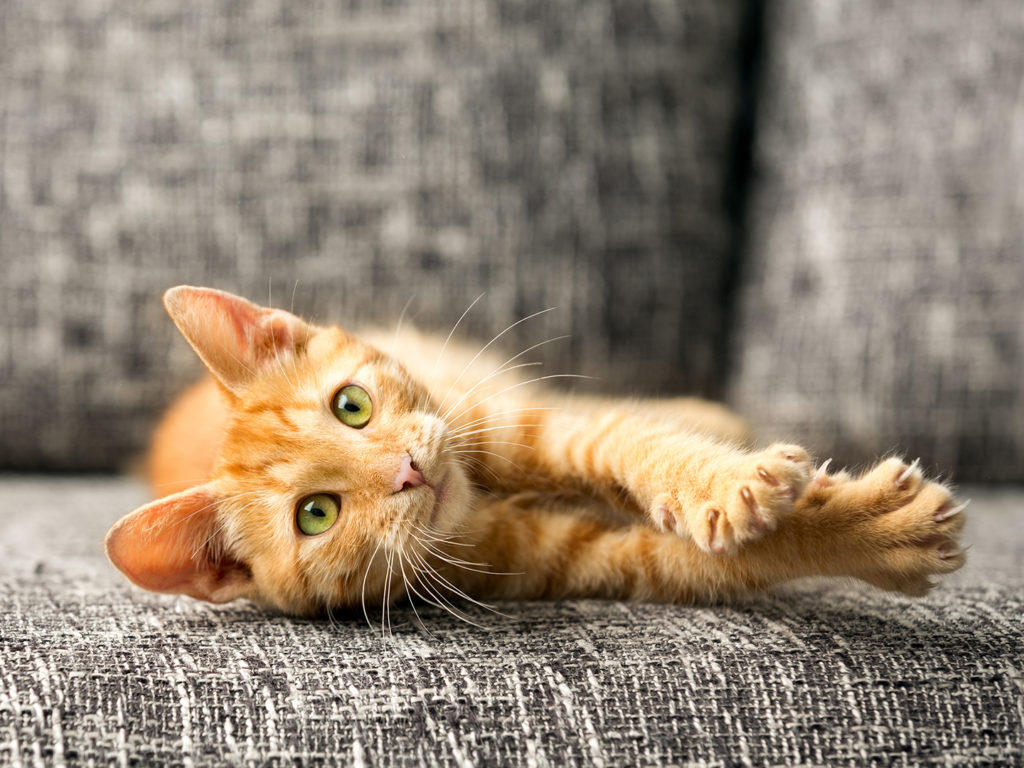

In [19]:
img = PILImage.create(upload.data[-1])
pred, _ , prob = learn.predict(img)
print(f'Is this a cat?: {pred}')
print(f'Probability: {prob[1].item():.3f}')
img